In [1]:
import os
os.chdir("../deepsvg_own_data")
from deepsvg.svglib.geom import Point
from deepsvg.svglib.svg import SVG
from deepsvg.svglib.svg_path import SVGPath
from deepsvg.svglib.utils import to_gif

from deepsvg.difflib.tensor import SVGTensor
from deepsvg.difflib.utils import *
from deepsvg.difflib.loss import *
from deepsvg.svglib.geom import Bbox

In [15]:
import random
def load_svg(path, file):
        svg = SVG.load_svg(os.path.join(path, file))

        #if not self.already_preprocessed:
        svg.fill_(False)
        svg.normalize().zoom(0.9)
        svg.canonicalize()
        svg = svg.simplify_heuristic()

        return svg

def _augment(svg, mean=False):
    dx, dy = (0, 0) if mean else (5 * random.random() - 2.5, 5 * random.random() - 2.5)
    factor = 0.7 if mean else 0.2 * random.random() + 0.6

    return svg.zoom(factor).translate(Point(dx, dy))


def simplify(svg, normalize=True):
    svg.canonicalize(normalize=normalize)
    svg = svg.simplify_heuristic()
    return svg.normalize()

def preprocess(svg, augment=True, numericalize=False, mean=False):
        if augment:
            svg = _augment(svg, mean=mean)
        if numericalize:
            return svg.numericalize(256)
        return svg


In [3]:
import pickle as pkl
path = "/home/defuc/sensei-fs-symlink/users/defuc/dataset/Dataset_font/DeepSVG_format/Train_name"
F_data = open(path+'/data.pkl','rb')
F_name = open(path+'/data_name.pkl','rb')
data_pkl = pkl.load(F_data)
data_name = pkl.load(F_name)

In [9]:
root_path = '/home/defuc/sensei-fs-symlink/users/defuc/dataset/Dataset_font/Train/svg'
files= os.listdir(root_path)

In [35]:
data = load_svg(root_path, files[0])

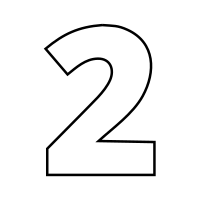

In [36]:
data.draw()

In [34]:
#preprocess(data)
data.draw()

'<svg xmlns="http://www.w3.org/2000/svg" viewBox="0.0 0.0 24.0 24.0" height="200px" width="200px"><path fill="none" stroke="black" stroke-width=".3" stroke-opacity="1.0"  filling="0" d="M14.58714485168457 3.385560989379883 L14.58714485168457 3.385560989379883 C15.830913543701172 3.824618339538574 16.356204986572266 3.88037109375 17.376083374023438 4.727868556976318 C18.78614044189453 5.899599552154541 19.279787063598633 7.342388153076172 19.135129928588867 8.789478302001953 C18.99047088623047 10.236568450927734 18.207515716552734 11.68796157836914 17.064369201660156 12.87690258026123 C16.229305267333984 13.745418548583984 15.122779846191406 14.43665599822998 13.964776039123535 15.044448852539062 C12.80677318572998 15.652240753173828 11.5972900390625 16.176586151123047 10.556312561035156 16.711318969726562 L17.004629135131836 18.56464958190918 L15.983114242553711 22.376996994018555 L9.77015495300293 20.712238311767578 L3.5571956634521484 19.047481536865234 L4.373013019561768 16.00280952

In [37]:

data2 = data.rotate(Angle(15)) 

In [42]:
root_path_aug = '/home/defuc/sensei-fs-symlink/users/defuc/dataset/Dataset_font/Train/svg_augment/'

In [43]:
! mkdir /home/defuc/sensei-fs-symlink/users/defuc/dataset/Dataset_font/Train/svg_augment/

In [45]:
data_npy = []
data_labels = []
data_length = []
data_name = []
max_length = 0
train_data_dic = {}

def data_add(data, name):
    data_tensor = data.to_tensor(concat_groups=True, PAD_VAL=-1)
    data_tensor = np.array(data_tensor)
    data_less_col = data_tensor[:,6:]
    data_label = data_tensor[:,:1]
    data_npy.append(data_less_col)
    data_labels.append(data_label.squeeze())
    train_data_dic[name] = data_less_col
    data_name.append(name)
    
    # if len(np.unique(data_label))>3:
    #     print(np.unique(data_label))
    data_length.append(len(data_less_col))    
    # if len(data_less_col)>max_length:
    #     max_length = len(data_less_col)
    return #max_length

for file in files:
#     data = load_svg(root_path, file)
    
#     data_add(data, file[:-4])
    
    data = load_svg(root_path, file).rotate(Angle(45)) 
    
    data.save_svg(root_path_aug + file[:-4]+'@45.svg')
    
    
    data_add(data, file[:-4]+'@45')
    
    data = load_svg(root_path, file).rotate(Angle(90)) 
    
    data.save_svg(root_path_aug + file[:-4]+'@90.svg')
    
    data_add(data, file[:-4]+'@90')
    
    data = load_svg(root_path, file).rotate(Angle(135)) 
    
    data.save_svg(root_path_aug + file[:-4]+'@135.svg')
    
    data_add(data, file[:-4]+'@135')
    
    data = load_svg(root_path, file).rotate(Angle(180)) 
    
    data.save_svg(root_path_aug + file[:-4]+'@180.svg')
    
    data_add(data, file[:-4]+'@180')
    
    data = load_svg(root_path, file)
    
    data = preprocess(data)
    
    data.save_svg(root_path_aug + file[:-4]+'@aug.svg')
    
    data_add(data, file[:-4]+'@aug')
    
    